# AIQ prediction using Regression

## Import Package

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Import Dataset 

In [2]:
df = pd.read_csv("air_quality.csv")   
df.head()

,datetime,pm25,pm10,no2,co,so2,o3,temp,rh,wind,rain
0,2015-01-01 00:00:00,150.849670,257.310990,32.664554,1.204211,4.816183,1.364593,17.926895,42.058440,0.1,1.085120
1,2015-01-01 01:00:00,132.370120,254.495468,31.878915,0.860830,1.937702,1.000000,16.655569,37.960572,0.1,0.000000
2,2015-01-01 02:00:00,157.994518,256.419390,28.320158,0.074682,4.197653,2.516940,17.283748,37.412200,0.1,0.000000
3,2015-01-01 03:00:00,173.358215,269.406690,33.000651,2.563948,7.383085,1.000000,34.383131,17.713272,0.1,0.393723
4,2015-01-01 04:00:00,201.753827,335.956343,30.997890,1.326620,2.140768,1.000000,18.198381,39.903303,0.1,0.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87672 entries, 0 to 87671
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  87672 non-null  object 
 1   pm25      87672 non-null  float64
 2   pm10      87672 non-null  float64
 3   no2       87672 non-null  float64
 4   co        87672 non-null  float64
 5   so2       87672 non-null  float64
 6   o3        87672 non-null  float64
 7   temp      87672 non-null  float64
 8   rh        87672 non-null  float64
 9   wind      87672 non-null  float64
 10  rain      87672 non-null  float64
dtypes: float64(10), object(1)
memory usage: 7.4+ MB


## Check Missing Values

In [4]:
df.isnull().sum()

datetime    0
pm25        0
pm10        0
no2         0
co          0
so2         0
o3          0
temp        0
rh          0
wind        0
rain        0
dtype: int64

## Converting Datetime Column into Meaningful Features

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

## Creating Feature Matrix + Target Variable

In [6]:
features = ['pm10','no2','co','so2','o3','temp','rh','wind','rain','month','hour']

X = df[features]
y = df['pm25']

## Correlation Heatmap

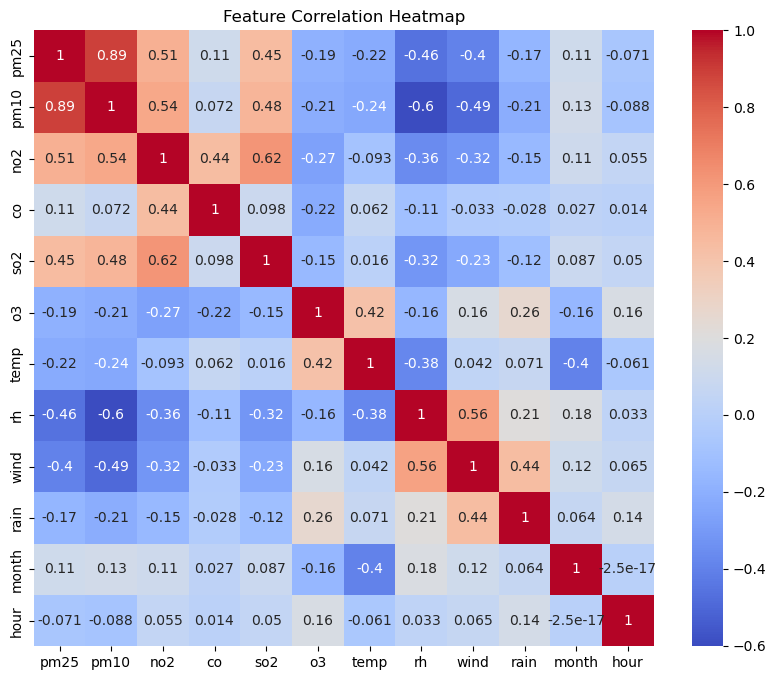

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['pm25'] + features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## Basic Visualisations

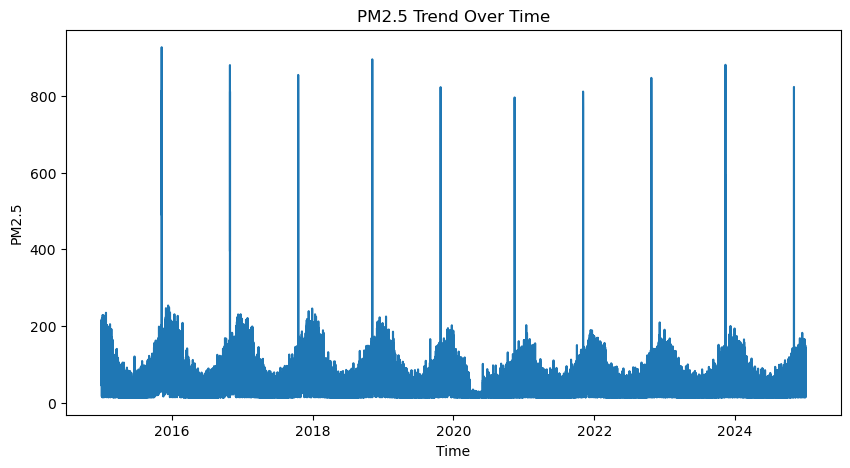

In [8]:
# PM2.5 Trend

plt.figure(figsize=(10,5))
plt.plot(df['datetime'], df['pm25'])
plt.title("PM2.5 Trend Over Time")
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.show()

## Train–Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

## Fit All Three Models

### Linear Regression

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Decision Tree 

In [11]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Random Forest

In [12]:
rf = RandomForestRegressor(
    n_estimators=200,
    min_samples_leaf=2,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, n_estimators=200, random_state=42)

## Model Testing

In [13]:
models = {
    "Linear Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([name, rmse, mae, r2])

results_df = pd.DataFrame(results, columns=["Model","RMSE","MAE","R2"])
results_df

,Model,RMSE,MAE,R2
0,Linear Regression,19.859631,13.865592,0.808355
1,Decision Tree,24.411751,17.635473,0.710431
2,Random Forest,17.231736,12.798507,0.855718


## Predicition vs Actual (All Models)

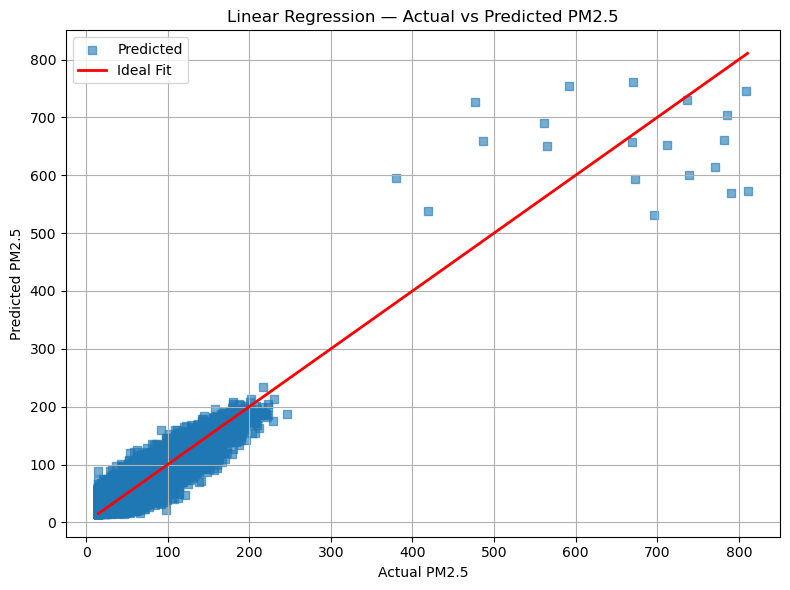

In [14]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted", marker='s')

# identity line (perfect prediction)
line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line, line, color='red', linewidth=2, label='Ideal Fit')

plt.title("Linear Regression — Actual vs Predicted PM2.5")
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

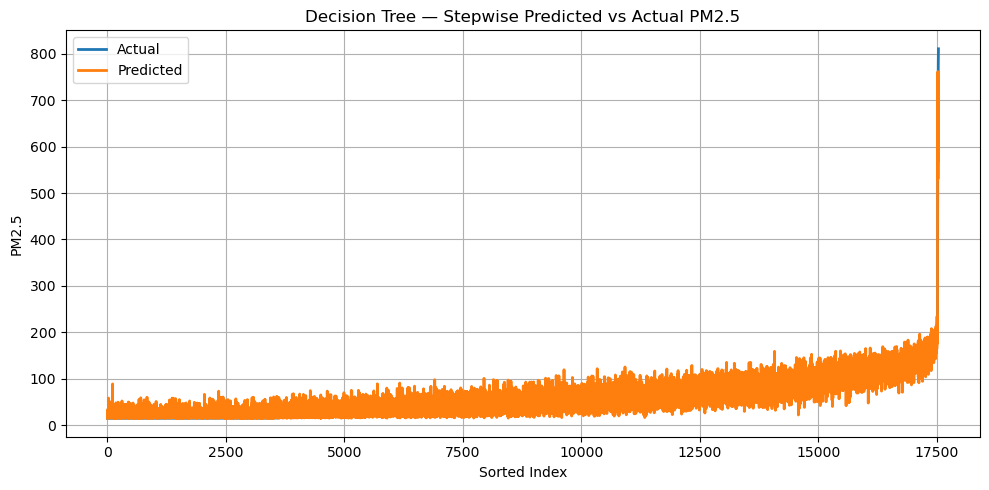

In [15]:
order = np.argsort(y_test)
yt = np.array(y_test)[order]
yp = np.array(y_pred)[order]

plt.figure(figsize=(10,5))
plt.plot(yt, label="Actual", linewidth=2)
plt.step(range(len(yp)), yp, where='mid', label="Predicted", linewidth=2)

plt.title("Decision Tree — Stepwise Predicted vs Actual PM2.5")
plt.xlabel("Sorted Index")
plt.ylabel("PM2.5")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

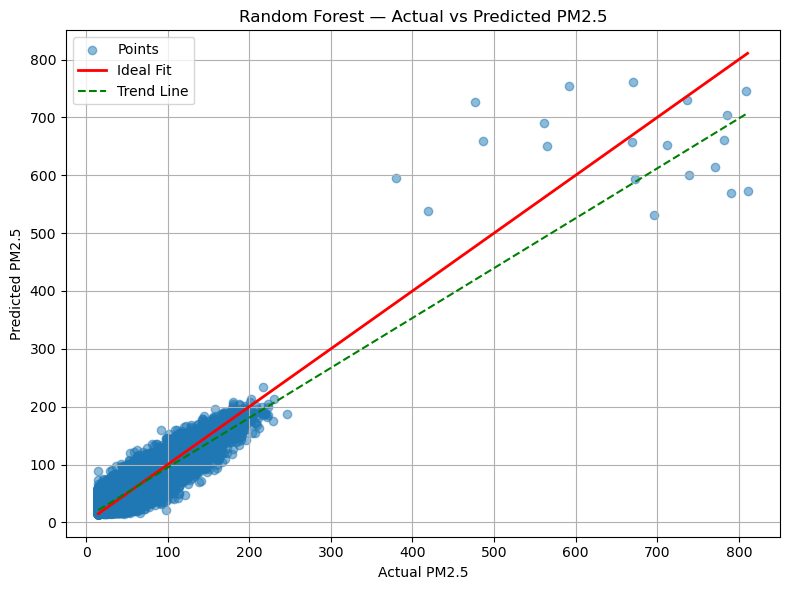

In [16]:
from scipy.stats import linregress
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, alpha=0.5, marker='o', label="Points")

# ideal line
line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line, line, color='red', linewidth=2, label='Ideal Fit')

# regression line through predictions
slope, intercept, *_ = linregress(y_test, y_pred)
plt.plot(line, slope*line + intercept, color='green', linestyle='--', label='Trend Line')

plt.title("Random Forest — Actual vs Predicted PM2.5")
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()